# Eksploracyjna analiza danych

## Import bibliotek

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Wczytanie danych

In [6]:
df = pd.read_csv('../data/processed/energy_and_weather_data.csv')
df.head()

,time,total_load,temp,pressure,humidity,wind_speed,rain_1h,clouds_all
0,2015-01-01 00:00:00+00:00,24382.0,272.512700,1016.2,82.4,2.0,0.0,0.0
1,2015-01-01 01:00:00+00:00,22734.0,272.099137,1016.8,82.0,2.4,0.0,0.0
2,2015-01-01 02:00:00+00:00,21286.0,272.089469,1016.6,82.0,2.4,0.0,0.0
3,2015-01-01 03:00:00+00:00,20264.0,272.145900,1016.6,82.0,2.4,0.0,0.0
4,2015-01-01 04:00:00+00:00,19905.0,272.024000,1017.4,82.6,2.4,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        35064 non-null  object 
 1   total_load  35064 non-null  float64
 2   temp        35064 non-null  float64
 3   pressure    35064 non-null  float64
 4   humidity    35064 non-null  float64
 5   wind_speed  35064 non-null  float64
 6   rain_1h     35064 non-null  float64
 7   clouds_all  35064 non-null  float64
dtypes: float64(7), object(1)
memory usage: 2.1+ MB


## Przegląd danych

### Opis tabeli

- **total_load** - całkowite zapotrzebowanie na energię elektryczną (MW)

- **temp** - temperatura (K)

- **pressure** - ciśnienie (hPa)

- **humidity** - wilgotność (%)

- **wind_speed** - prędkość wiatru (m/s)

- **rain_1h** - ilość deszczu w ciągu godziny (mm)

- **clouds_all** - zachmurzenie (%)

- **date** - data

- **hour** - godzina dnia

### Podstawowe statystyki opisowe

In [11]:
display(df.describe())

,total_load,temp,pressure,humidity,wind_speed,rain_1h,clouds_all
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,28698.254863,289.680363,1070.206390,68.217013,2.467546,0.073212,24.737415
std,4575.850755,7.260721,2692.266463,14.890167,1.357748,0.202562,17.306731
min,18041.000000,271.941863,812.400000,22.600000,0.000000,0.000000,0.000000
25%,24807.000000,284.060000,1012.800000,56.800000,1.400000,0.000000,12.000000
50%,28902.000000,289.025000,1017.000000,69.800000,2.200000,0.000000,22.400000
75%,32194.250000,295.086000,1021.000000,80.200000,3.200000,0.060000,35.000000
max,41015.000000,309.266000,202469.000000,100.000000,29.800000,4.150000,93.600000


## Wykresy

In [13]:
# Dodatkowe kolumny w celu dalszej analizy
df['time'] = pd.to_datetime(df['time'])

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour

### Rozkład zużycia energii 2015-2018

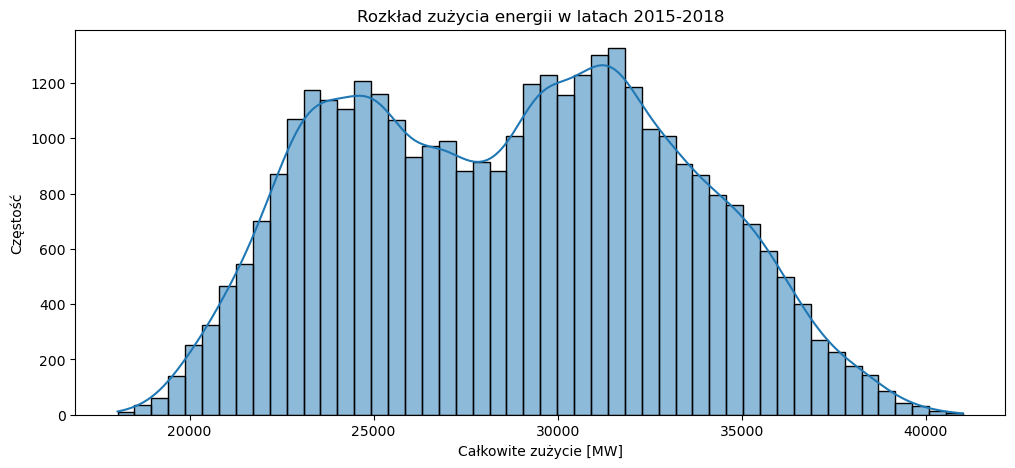

In [57]:
plt.figure(figsize=(12, 5))
sns.histplot(df['total_load'], kde=True, bins=50)
plt.title("Rozkład zużycia energii w latach 2015-2018")
plt.xlabel("Całkowite zużycie [MW]")
plt.ylabel("Częstość")
plt.savefig('../plots/zuzycie_energii.png')
plt.show()

### Rozkład zużycia energii w poszczególnych latach

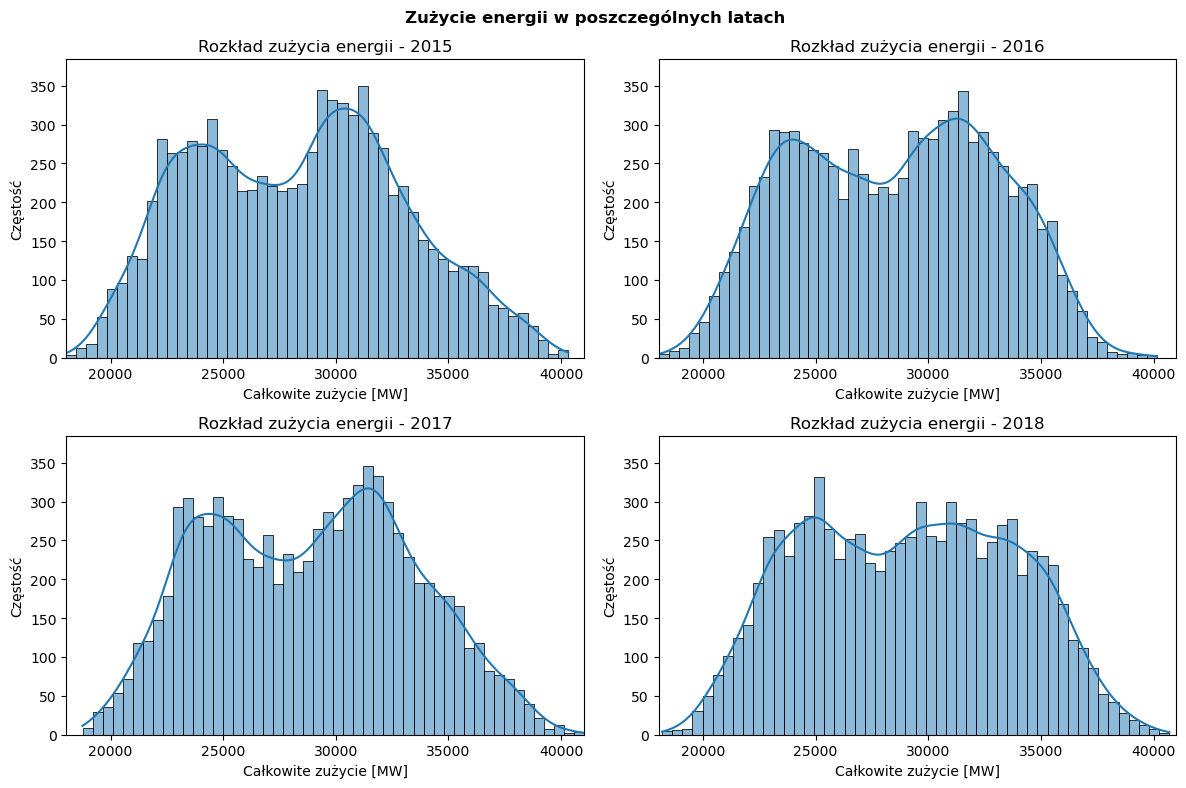

In [55]:
years = sorted(df['year'].unique())

# Zakresy osi
x_min = df['total_load'].min()
x_max = df['total_load'].max()

counts, _ = np.histogram(df['total_load'], bins=50)
bins = 50
y_max = 0
for year in years:
    data = df[df['year'] == year]['total_load']
    counts, bin_edges = np.histogram(data, bins=bins)
    max_count = counts.max()
    if max_count > y_max:
        y_max = max_count
y_max = y_max * 1.1

# Siatka wykresów 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()
fig.suptitle("Zużycie energii w poszczególnych latach", fontweight="bold")

# Histogramy
for i, year in enumerate(years):
    sns.histplot(df[df['year'] == year]['total_load'], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Rozkład zużycia energii - {year}')
    axes[i].set_xlabel('Całkowite zużycie [MW]')
    axes[i].set_ylabel('Częstość')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(0, y_max)

plt.tight_layout()
plt.savefig('../plots/zuzycie_energii_wedlug_lat.png')
plt.show()


### Średnie godzinowe zużycie energii 2015-2018

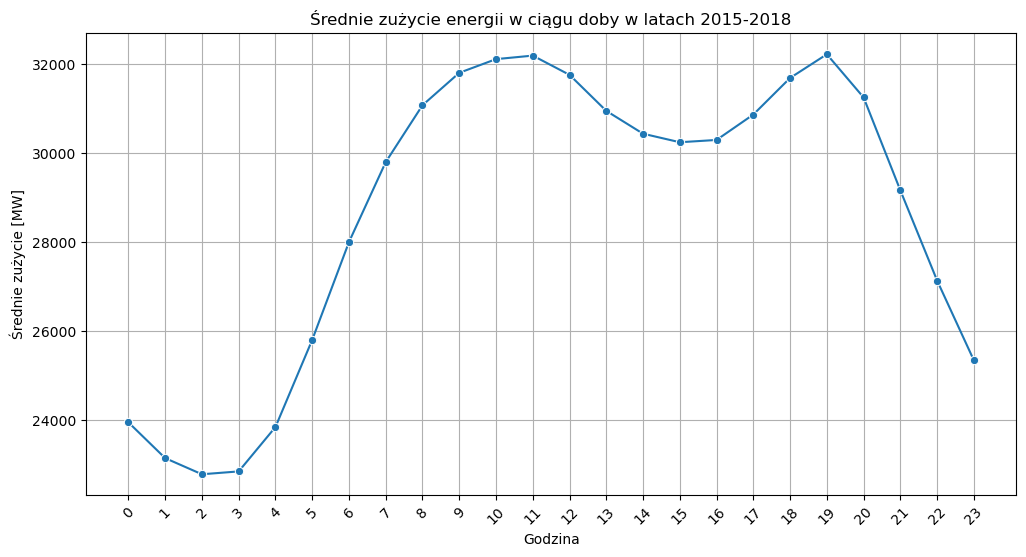

In [53]:
hourly_avg = df.groupby('hour')['total_load'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, marker='o')
plt.title("Średnie zużycie energii w ciągu doby w latach 2015-2018")
plt.xlabel("Godzina")
plt.ylabel("Średnie zużycie [MW]")
plt.xticks(ticks=hourly_avg.index, labels=hourly_avg.index, rotation=45)
plt.grid(True)
plt.savefig('../plots/srednie_zuzycie_energii_w_ciagu_doby.png')
plt.show()

### Średnie godzinowe zużycie energii w poszczególnych latach

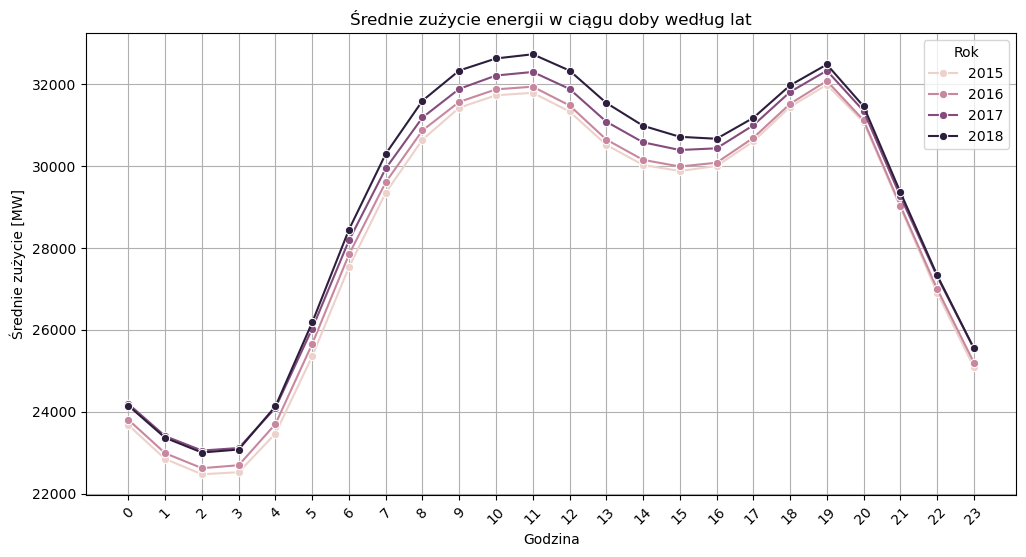

In [51]:
# Grupowanie po roku i godzinie, liczymy średnie
hourly_avg_yearly = df.groupby(['year', 'hour'])['total_load'].mean().reset_index()

plt.figure(figsize=(12, 6))

# Rysujemy wykres liniowy, rozdzielając po 'year'
sns.lineplot(data=hourly_avg_yearly, x='hour', y='total_load', hue='year', marker='o')

plt.title("Średnie zużycie energii w ciągu doby według lat")
plt.xlabel("Godzina")
plt.ylabel("Średnie zużycie [MW]")
plt.xticks(ticks=range(24), labels=range(24), rotation=45)
plt.grid(True)
plt.legend(title='Rok')
plt.savefig('../plots/srednie_zuzycie_energii_w_ciagu_doby_wedlug_lat.png')
plt.show()

### Średnie miesięczne zużycie w poszczególnych latach

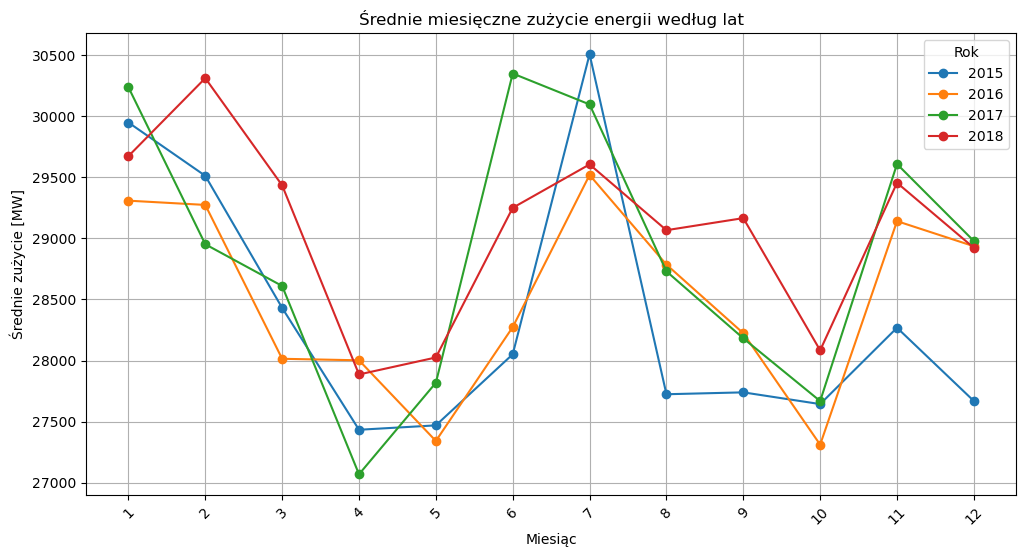

In [49]:
monthly_avg = df.groupby(['year', 'month'])['total_load'].mean().unstack(level=0)

monthly_avg.plot(figsize=(12, 6), marker='o')
plt.title("Średnie miesięczne zużycie energii według lat")
plt.xlabel("Miesiąc")
plt.ylabel("Średnie zużycie [MW]")
plt.xticks(ticks=range(1, 13), labels=range(1, 13), rotation=45)
plt.legend(title="Rok")
plt.grid(True)
plt.savefig('../plots/srednie_miesieczne_zuzycie_energii_wedlug_lat.png')
plt.show()

### W dane dni tygodnia

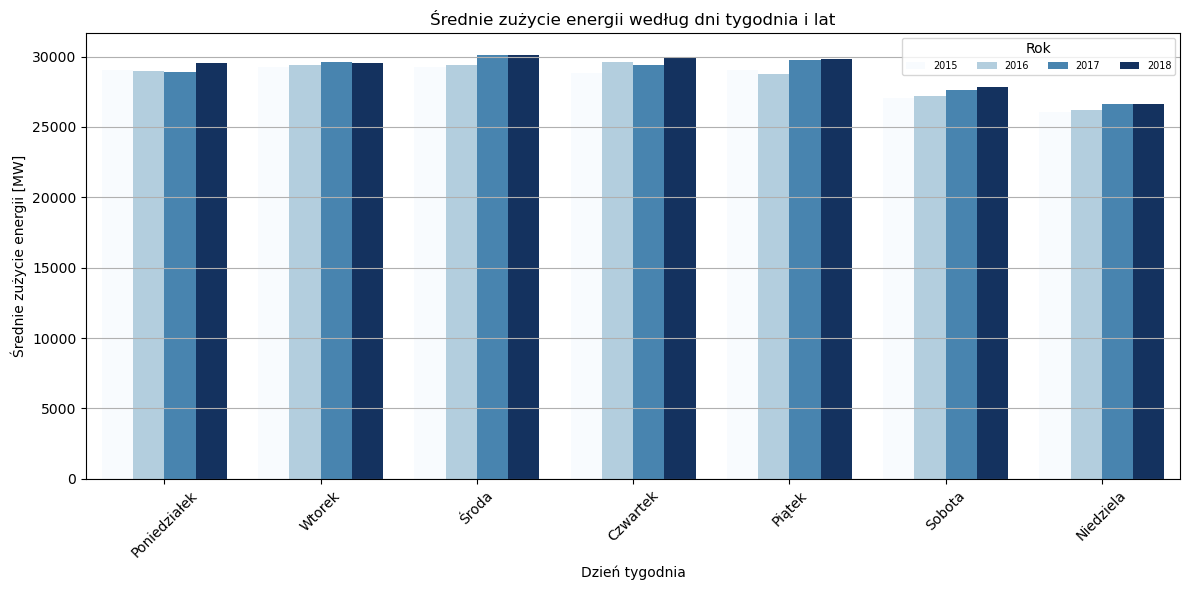

In [45]:

# Dodanie kolumn pomocniczych
df['year'] = df['time'].dt.year
df['weekday'] = df['time'].dt.dayofweek
df['weekday_name'] = df['time'].dt.day_name()

# Mapa angielskich nazw dni tygodnia na polskie
weekday_translation = {
    'Monday': 'Poniedziałek',
    'Tuesday': 'Wtorek',
    'Wednesday': 'Środa',
    'Thursday': 'Czwartek',
    'Friday': 'Piątek',
    'Saturday': 'Sobota',
    'Sunday': 'Niedziela'
}

# Dodanie kolumny z polską nazwą dnia
df['weekday_pl'] = df['weekday_name'].map(weekday_translation)

# Grupowanie: średnie zużycie energii według roku i dnia tygodnia
weekday_avg_by_year = df.groupby(['year', 'weekday_pl'])['total_load'].mean().reset_index()

# Ustawienie poprawnej kolejności dni tygodnia
weekday_order_pl = ['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
weekday_avg_by_year['weekday_pl'] = pd.Categorical(
    weekday_avg_by_year['weekday_pl'],
    categories=weekday_order_pl,
    ordered=True
)

# Wykres słupkowy z podziałem na lata
plt.figure(figsize=(12, 6))
sns.barplot(
    data=weekday_avg_by_year,
    x='weekday_pl',
    y='total_load',
    hue='year',
    palette='Blues'
)

plt.title("Średnie zużycie energii według dni tygodnia i lat")
plt.xlabel("Dzień tygodnia")
plt.ylabel("Średnie zużycie energii [MW]")
plt.xticks(rotation=45)
plt.legend(title='Rok', ncols=4, fontsize=7)
plt.grid(True, axis='y')
plt.tight_layout()
plt.savefig('../plots/srednie_zuzycie_energii_wedlug_dni_tygodnia_i_lat.png')
plt.show()


### Korelacje między zmiennymi

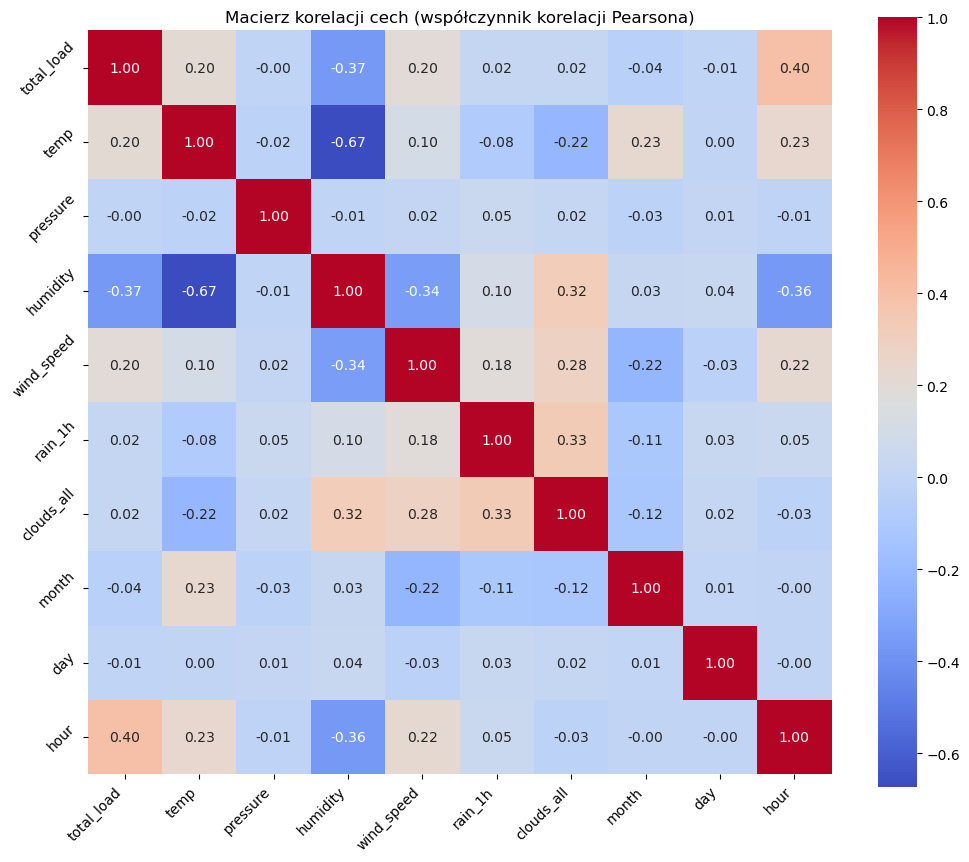

In [75]:
plt.figure(figsize=(12, 10))
corr_matrix = df.drop(columns=['year', 'weekday', 'weekday_name', 'weekday_pl', 'time'], axis=1).corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Macierz korelacji cech (współczynnik korelacji Pearsona)")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.savefig('../plots/macierz_korelacji_cech.png')
plt.show()

Największą korelację ze zmienną docelową total_load ma zmienna hour (0.40), co jest dość intuicyjne - są pory dnia, w których energii zużywa się zdecydowanie więcej (dzień vs noc). 

Relatywnie wysoką, choć ogólnie niską, korelację ze zmienną total_load mają: zmienna humidity (-0.37) oraz temp (0.20), które z kolei są silnie od siebie zależne (-0.67).

### Zależność zużycia energii od temperatury oraz wilgotności

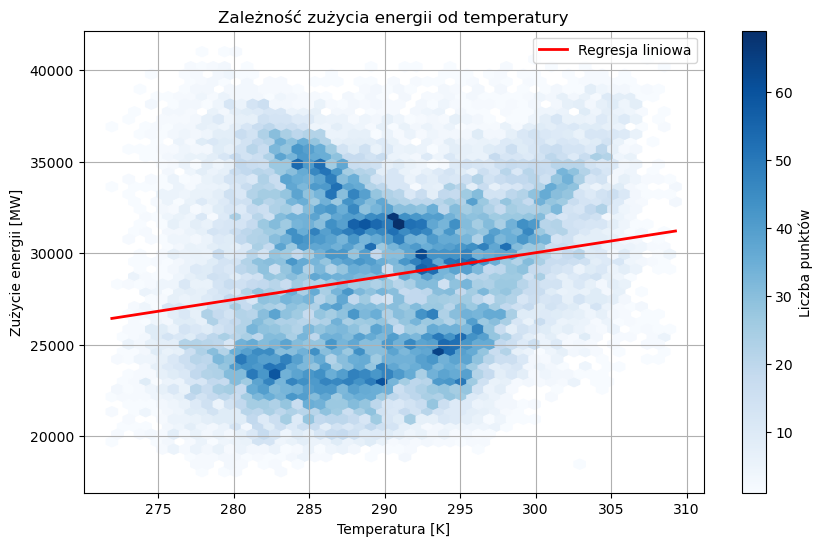

In [41]:
# Dane
X = df['temp'].values.reshape(-1, 1)
y = df['total_load'].values

# Regresja liniowa
model = LinearRegression()
model.fit(X, y)

# Predykcja do wykresu
temp_range = np.linspace(df['temp'].min(), df['temp'].max(), 500).reshape(-1, 1)
load_pred = model.predict(temp_range)

# Wykres hexbin + linia regresji
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['temp'], df['total_load'], gridsize=50, cmap='Blues', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Liczba punktów')

# Dodanie linii regresji
plt.plot(temp_range, load_pred, color='red', linewidth=2, label='Regresja liniowa')

plt.title("Zależność zużycia energii od temperatury")
plt.xlabel("Temperatura [K]")
plt.ylabel("Zużycie energii [MW]")
plt.legend()
plt.grid(True)
plt.savefig('../plots/zaleznosc_zuzycia_energii_od_temperatury.png')
plt.show()

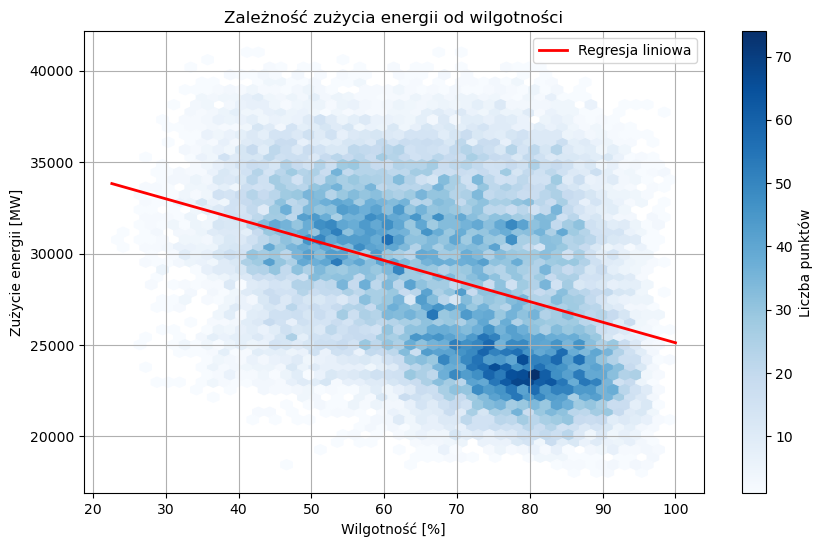

In [39]:
# Dane
X = df['humidity'].values.reshape(-1, 1)
y = df['total_load'].values

# Dopasowanie regresji liniowej
model = LinearRegression()
model.fit(X, y)

# Zakres do predykcji
humidity_range = np.linspace(df['humidity'].min(), df['humidity'].max(), 500).reshape(-1, 1)
load_pred = model.predict(humidity_range)

# Wykres hexbin + linia regresji
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['humidity'], df['total_load'], gridsize=50, cmap='Blues', mincnt=1)
cb = plt.colorbar(hb)
cb.set_label('Liczba punktów')

# Linia regresji
plt.plot(humidity_range, load_pred, color='red', linewidth=2, label='Regresja liniowa')

plt.title("Zależność zużycia energii od wilgotności")
plt.xlabel("Wilgotność [%]")
plt.ylabel("Zużycie energii [MW]")
plt.legend()
plt.grid(True)
plt.savefig('../plots/zaleznosc_zuzycia_energii_od_wilgotnosci.png')
plt.show()